In [1]:
import  numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection  import train_test_split

In [2]:
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple


from numpy import set_printoptions
import os.path
set_printoptions(precision=4)
pd.set_option('display.width', 160)
pd.set_option('precision', 4)

% matplotlib inline 

In [3]:
load_app_config()
DIRECTORY="course3"
FILENAME ='fruit_data_with_colors.txt'
RESPONSE="fruit_label"
input_path = get_datafolder_path()

{'UAT': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'PRD': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'DEV': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'REG': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}}
Adding F:\DataSource  to system path
Adding F:\MachineLearning  to system path


In [10]:
def load_dataset(filename=FILENAME,response=RESPONSE):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = pd.read_csv(input_file ,sep ='\t')
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    response_column =  [col for col in input_dataset.columns if response in col]
    feature_columns =  [col for col in input_dataset.columns if response not in col]
            
    
    return  input_dataset,feature_columns,response_column

In [11]:
input_dataset ,feature_columns,response_column  =  load_dataset (FILENAME,RESPONSE)
input_dataset.head(5)

 input file is :F:\DataSource\course3\fruit_data_with_colors.txt loaded.
Continous Variables
Index(['fruit_label', 'mass', 'width', 'height', 'color_score'], dtype='object')
Categorical Variables
Index(['fruit_name', 'fruit_subtype'], dtype='object')


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [12]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*40,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*40,"data header"))
    #print(X.head().to_string())
    print("<{0} {1} {0}>".format("="*40,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*40,"value_count -y"))
    print(y.groupby(response_column)[response_column].count())

In [24]:
select_features =['mass', 'width', 'height']
X = input_dataset[select_features]
y = input_dataset[response_column]
display_data_descriptives(input_dataset,X,feature_columns,y,response_column)

<======================================== feature columns ========================================>
['fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score']
<======================================== data header ========================================>
<======================================== response ========================================>
['fruit_label']
<======================================== Descriptive Statistics -X ========================================>
           mass    width   height
count   59.0000  59.0000  59.0000
mean   163.1186   7.1051   7.6932
std     55.0188   0.8169   1.3610
min     76.0000   5.8000   4.0000
25%    140.0000   6.6000   7.2000
50%    158.0000   7.2000   7.6000
75%    177.0000   7.5000   8.2000
max    362.0000   9.6000  10.5000
<======================================== Descriptive Statistics -y ========================================>
       fruit_label
count      59.0000
mean        2.5424
std         1.2080
min         1.0000


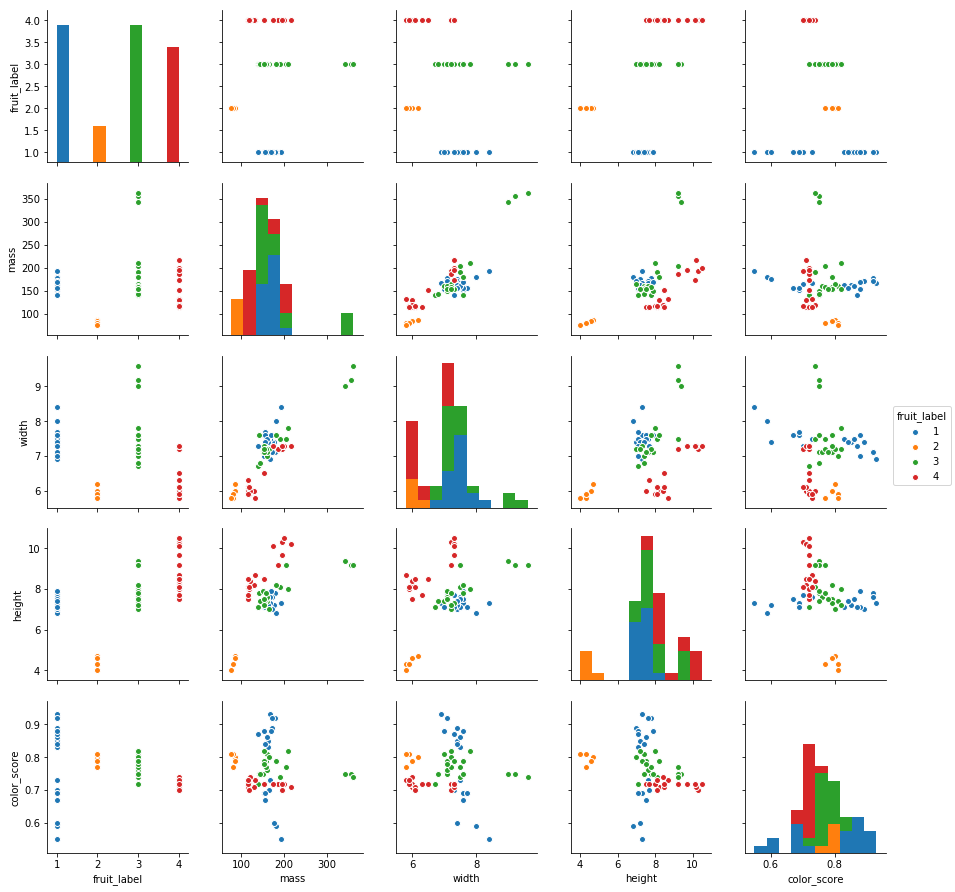

In [25]:
import seaborn as sns
 
sns.pairplot(input_dataset ,hue=response_column[0],kind='scatter', diag_kind='hist')


In [23]:
input_dataset?